### ==========================================================
### Les modules de travail
### ==========================================================

In [1]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### ===============================================================
###  Declaration du dossier de travail
### ===============================================================

In [2]:
import os
base= r'C:\Users\Jéros\Personnel\input'
base=base.replace('\\','/')
os.chdir(base)
os.getcwd()

'C:\\Users\\Jéros\\Personnel\\input'

### ===============================================================
### importation des  données 
### ===============================================================

In [3]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

# PRE-PROCESSING

-**Encodage** des facteurs (varaibles qualitatives) en numerique (0 ou 1)

-**Normalisation** pour rendre les données à la même echelle**

-**Imputation** pour remplacer les données manquantes NAN par la moyenne ou la mediane pourles variables quantitatives et       par la modalité la plus fréquente pour les variables qualitatives

-**Selection** permet d'utiliser les tests inférentielles pour choisir les variables les plus significatives pour                 l'intepretationdu modèle

-**Extration** permet de generer de nouvelles variables pour explorer les informations cachées dans le dataset

In [5]:
df_train = train.copy()
df_test = test.copy()

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
variables_drop = ['PassengerId','Ticket', 'SibSp', 'Parch']

df_train = df_train.drop(variables_drop, axis=1)
df_test = df_test.drop(variables_drop, axis=1)

df_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S


In [8]:
X_train= df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_train.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S


In [9]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
X_test = df_test
X_test.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,NaN,S


In [11]:
gender_submission
y_test=gender_submission['Survived']
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

#### Extraction sur les variables qualitatives

In [12]:
X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)# tout stringaccompagné de point(.)
X_test['Title'] = X_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)# tout stringaccompagné de point(.)
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)
X_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Lady          1
Mme           1
Countess      1
Jonkheer      1
Capt          1
Don           1
Ms            1
Name: Title, dtype: int64

In [13]:
def extratCabin(df):
    df['Cabin'] = df['Cabin'].str[:1]
    return df.head()

extratCabin(X_train)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
0,3,male,22.0,7.2500,NaN,S,Mr
1,1,female,38.0,71.2833,C,C,Mrs
2,3,female,26.0,7.9250,NaN,S,Miss
3,1,female,35.0,53.1000,C,S,Mrs
4,3,male,35.0,8.0500,NaN,S,Mr


In [14]:
extratCabin(X_test)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
0,3,male,34.5,7.8292,NaN,Q,Mr
1,3,female,47.0,7.0000,NaN,S,Mrs
2,2,male,62.0,9.6875,NaN,Q,Mr
3,3,male,27.0,8.6625,NaN,S,Mr
4,3,female,22.0,12.2875,NaN,S,Mrs


### Pipeline  de transformation 

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
numerical_features = ['Pclass', 'Age','Fare' ]
categorical_features = ['Sex', 'Cabin','Embarked','Title']

In [17]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])


In [18]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

## Modellisation

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [23]:
model = Pipeline(steps=[('preprocessor', preprocessor),('SGDClassif', SGDClassifier())])
model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [24]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8086124401913876

## Selector

In [25]:
preprocessorS = ColumnTransformer(transformers=[('num', numeric_transformer, selector(dtype_exclude="object")),
                                                ('cat', categorical_transformer, selector(dtype_include="object"))])

modelS = Pipeline(steps=[('preprocessor', preprocessorS),('SGDClassif', SGDClassifier())])


modelS.fit(X_train, y_train)
print("model score: %.3f" % modelS.score(X_test, y_test))

model score: 0.677


#### Chaine de transfromation et modèle

In [46]:
KNN = Pipeline(steps=[('preprocessor', preprocessor),('KNN', KNeighborsClassifier(n_neighbors = 13))])
TreeDecision =Pipeline(steps=[('preprocessor', preprocessor),('Decision', DecisionTreeClassifier())])
RandomForest = Pipeline(steps=[('preprocessor', preprocessor),('RandomForest', RandomForestClassifier(n_estimators=13,random_state=0))]) 
SVCmodel = Pipeline(steps=[('preprocessor', preprocessor),('SVC', SVC())])
SGDClassif =Pipeline(steps=[('preprocessor', preprocessor),('SGDClassif', SGDClassifier())])
GaussienBayes = Pipeline(steps=[('preprocessor', preprocessor),('NB', GaussianNB())])

In [47]:
dict_of_models = {'RandomForest': RandomForest,
                  'TreeDecision' : TreeDecision,
                  'KNN': KNN,
                  'SGDClassif':SGDClassif,
                  'SVCmodel':SVCmodel,
                  #'GaussienBayes':GaussienBayes
                  
                 }


In [43]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [44]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

RandomForest
[[211  55]
 [ 35 117]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       266
           1       0.68      0.77      0.72       152

    accuracy                           0.78       418
   macro avg       0.77      0.78      0.77       418
weighted avg       0.79      0.78      0.79       418

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TreeDecision
[[215  51]
 [ 33 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       266
           1       0.70      0.78      0.74       152

    accuracy                           0.80       418
   macro avg       0.78      0.80      0.79       418
weighted avg       0.81      0.80      0.80       418

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
KNN
[[255  11]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       266
           1       0.92      0.81      0.86     

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

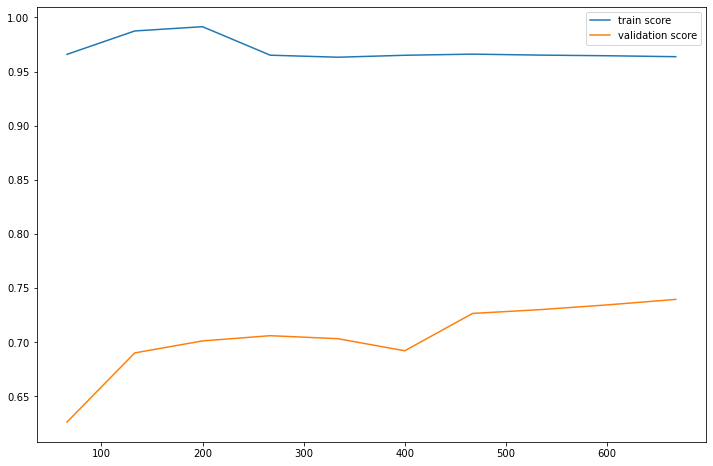

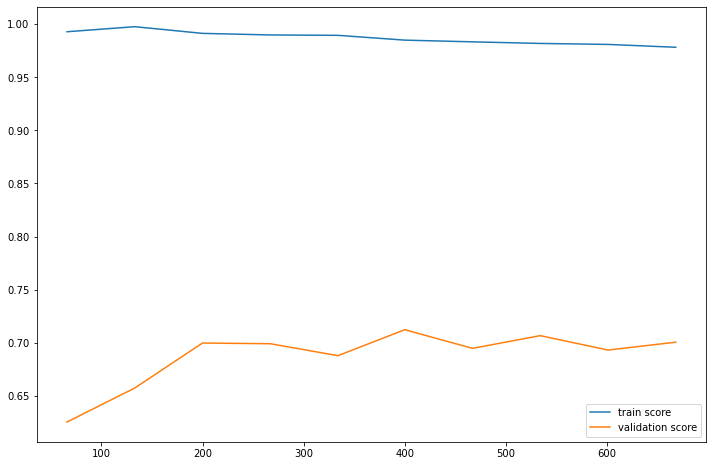

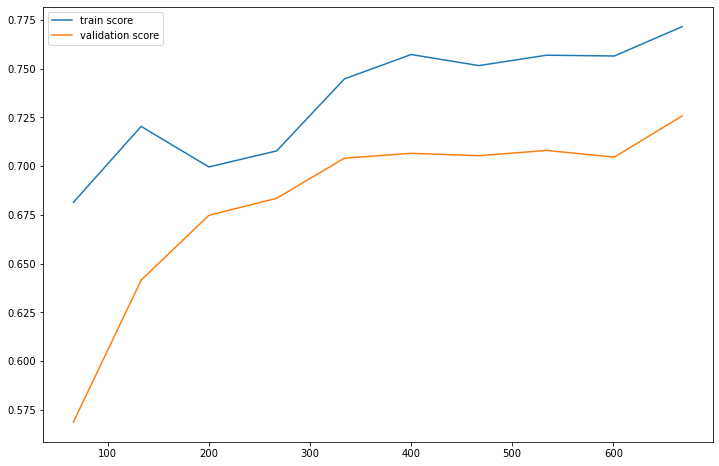

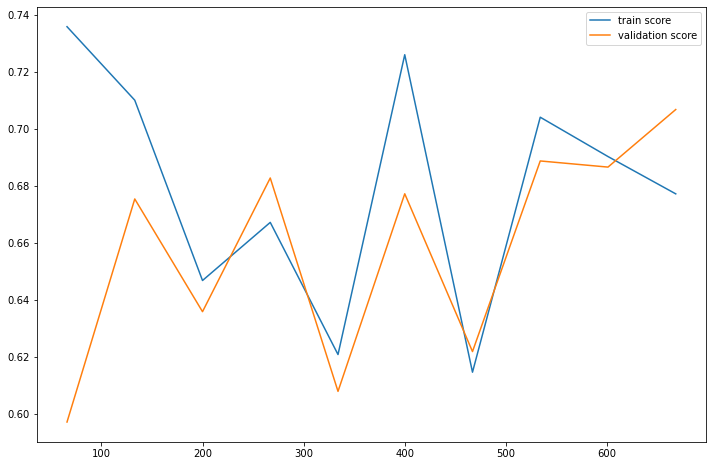

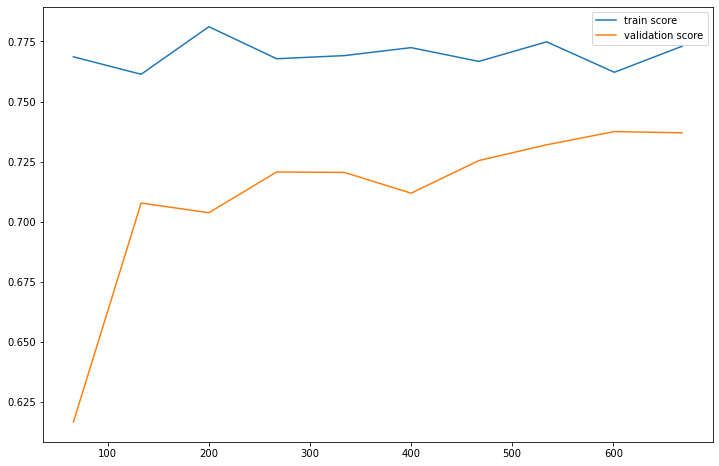

In [48]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [31]:
KNN

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [32]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','constant'],
    'KNN__n_neighbors': [10, 12, 15,28,48, 100]
}


In [34]:
grid_search = GridSearchCV(KNN, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f" % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.928


In [35]:
print(grid_search.best_params_)

{'KNN__n_neighbors': 15, 'preprocessor__num__imputer__strategy': 'median'}


In [36]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       266
           1       0.96      0.84      0.90       152

    accuracy                           0.93       418
   macro avg       0.94      0.91      0.92       418
weighted avg       0.93      0.93      0.93       418



[[260   6]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       266
           1       0.96      0.84      0.90       152

    accuracy                           0.93       418
   macro avg       0.94      0.91      0.92       418
weighted avg       0.93      0.93      0.93       418

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


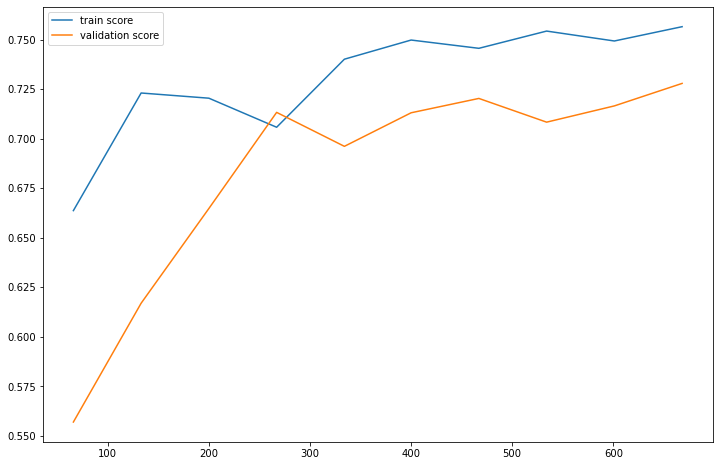

In [37]:
evaluation(grid_search.best_estimator_)

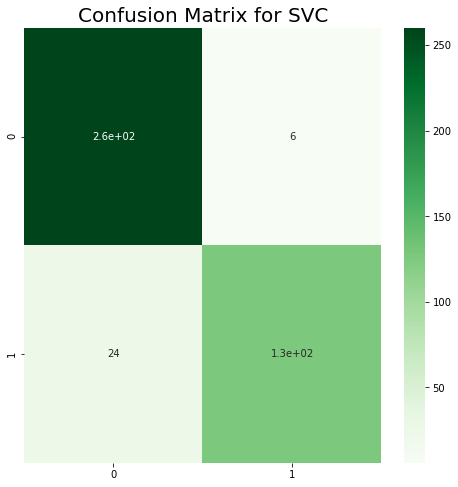

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for SVC', fontweight = 30, fontsize = 20)
plt.show()

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
resultat1 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

resultat1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
SVCmodel

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [60]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','constant'],
    'SVC__C': [1, 1.5 ,2, 10, 100]
}


In [61]:
grid_search = GridSearchCV(SVCmodel, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f" % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.871


In [62]:
print(grid_search.best_params_)

{'SVC__C': 2, 'preprocessor__num__imputer__strategy': 'median'}


[[253  13]
 [ 41 111]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       266
           1       0.90      0.73      0.80       152

    accuracy                           0.87       418
   macro avg       0.88      0.84      0.85       418
weighted avg       0.87      0.87      0.87       418

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


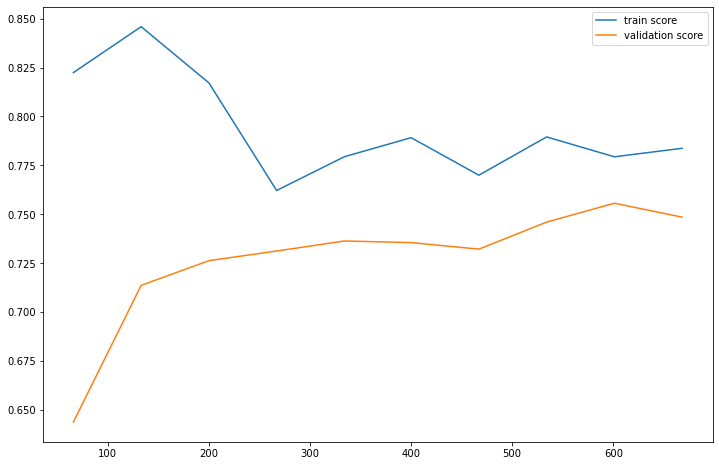

In [59]:
evaluation(grid_search.best_estimator_)